In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Read the AirBnB Data
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23627 entries, 0 to 23626
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23627 non-null  int64  
 1   NAME                            23551 non-null  object 
 2   host id                         23627 non-null  int64  
 3   host_identity_verified          23532 non-null  object 
 4   host name                       23587 non-null  object 
 5   neighbourhood group             23600 non-null  object 
 6   neighbourhood                   23611 non-null  object 
 7   lat                             23619 non-null  float64
 8   long                            23619 non-null  float64
 9   country                         23540 non-null  object 
 10  country code                    23548 non-null  object 
 11  instant_bookable                23548 non-null  object 
 12  cancellation_policy             

In [7]:
df.duplicated().value_counts()

,count
False,23627


In [8]:
#neighbourhood group was "brookln" instead of "Brooklyn"
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [9]:
#drop duplicate records
df.drop_duplicates(inplace=True)

In [10]:
#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

In [11]:
#remove all dolar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','', regex= False)
df['service fee'] = df['service fee'].str.replace('$','', regex= False)

In [12]:
#remove all comma signs in the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex= False)
df['service fee'] = df['service fee'].str.replace(',','', regex= False)

In [13]:
#rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'price_$', 'service fee':'service fee_$'}, inplace=True)

In [14]:
#drop all records with missing values
df.dropna(inplace=True)

In [15]:
#changed all mismatched data types to apppropriate once
df['price_$'] = df['price_$'].astype(float)
df['service fee_$'] = df['service fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

/tmp/ipython-input-3268695287.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [16]:
#correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

In [17]:
#get rid of outliers int the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [18]:
df.duplicated().value_counts()


,count
False,18859


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18859 entries, 0 to 23625
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18859 non-null  object        
 1   NAME                            18859 non-null  object        
 2   host id                         18859 non-null  object        
 3   host_identity_verified          18859 non-null  object        
 4   host name                       18859 non-null  object        
 5   neighbourhood group             18859 non-null  object        
 6   neighbourhood                   18859 non-null  object        
 7   lat                             18859 non-null  float64       
 8   long                            18859 non-null  float64       
 9   country                         18859 non-null  object        
 10  country code                    18859 non-null  object        
 11  instant

In [20]:
df.describe()

,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859,18859.000000,18859.000000,18859.000000,18859.000000
mean,40.728816,-73.955305,2012.486240,620.562861,124.114587,7.060343,41.090938,2018-04-26 00:55:58.142001152,0.967346,2.996023,3.352935,177.139138
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688520,-73.982625,2008.000000,329.000000,66.000000,2.000000,4.000000,2017-03-29 00:00:00,0.110000,2.000000,1.000000,50.000000
50%,40.722270,-73.956880,2012.000000,616.000000,123.000000,3.000000,14.000000,2019-01-01 00:00:00,0.370000,3.000000,1.000000,170.000000
75%,40.763960,-73.940355,2017.000000,911.000000,182.000000,5.000000,56.000000,2019-06-17 00:00:00,1.340000,4.000000,2.000000,296.000000
max,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,16.220000,5.000000,121.000000,426.000000
std,0.054073,0.040693,5.765402,334.218666,66.846765,21.985766,59.537252,NaN,1.331245,1.418308,10.983271,134.396613


In [21]:
#what are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,10393
Private room,8197
Shared room,269


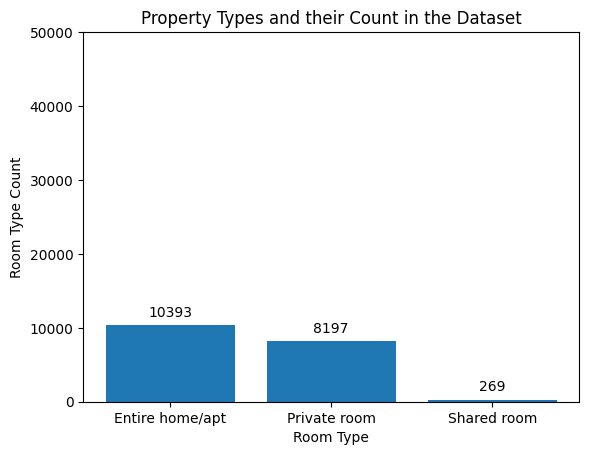

In [22]:
#room type plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their Count in the Dataset');

In [23]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,8416
Brooklyn,8250
Queens,1764
Bronx,313
Staten Island,116


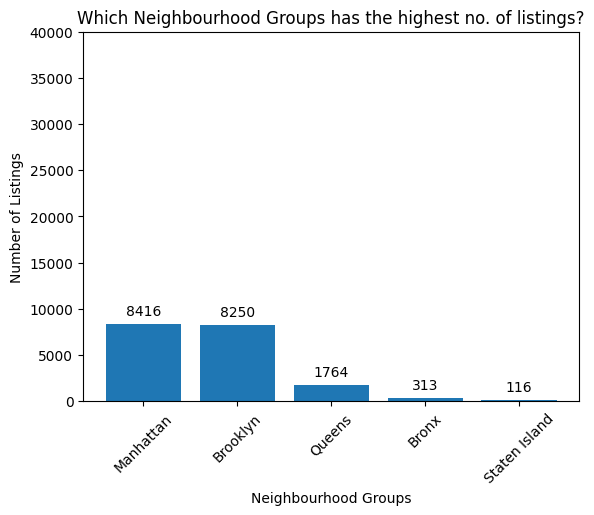

In [24]:
#which neighbourhood groups has the highest no. of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4);
plt.ylim([0, 40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Groups has the highest no. of listings?');

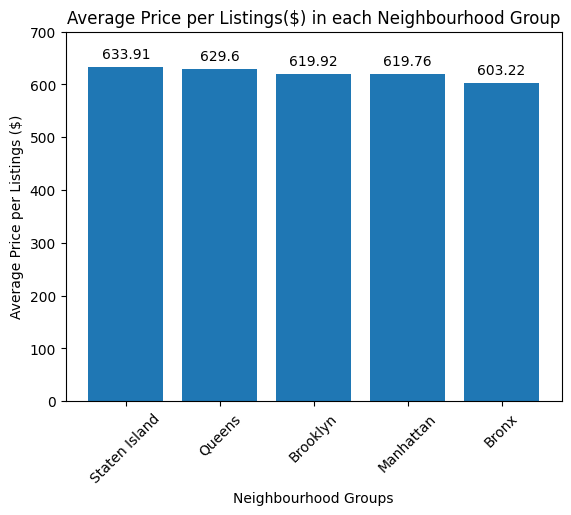

In [25]:
#which neighbourhood group have the highest average prices for AirBnB listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, "price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings($) in each Neighbourhood Group');

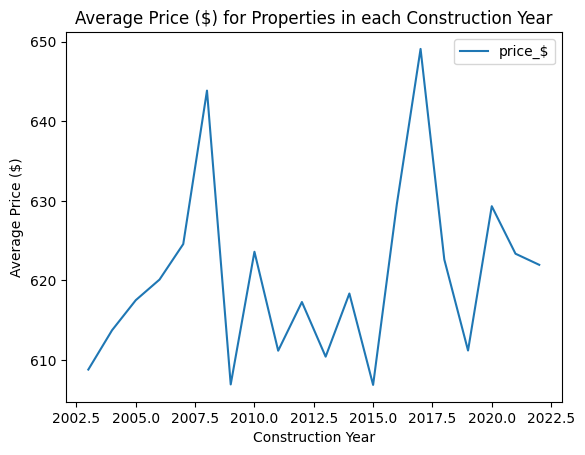

In [26]:
#is there a relationship between the construction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

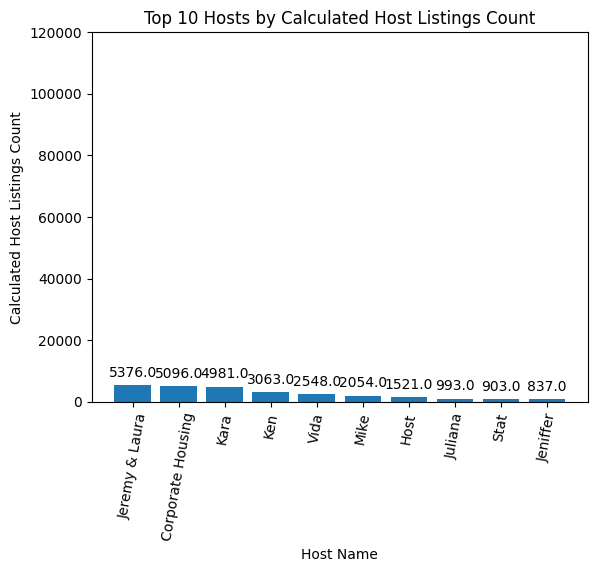

In [27]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, "calculated host listings count"]);
plt.bar_label(hosts_bar, labels = hosts.loc[:, "calculated host listings count"], label_type = 'edge', padding = 4);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

In [28]:
#are host verified identities more likely to recieve positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.003631
unconfirmed,2.988519


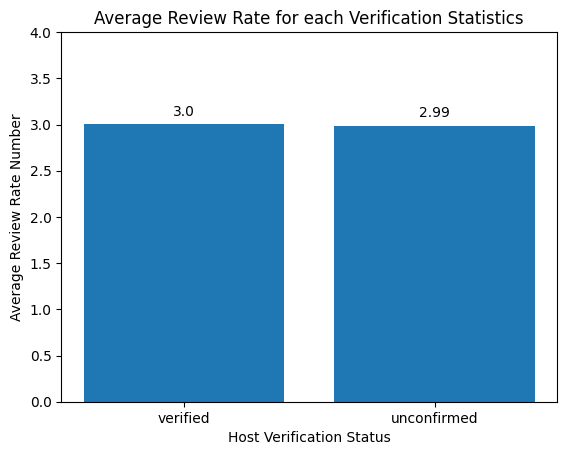

In [29]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

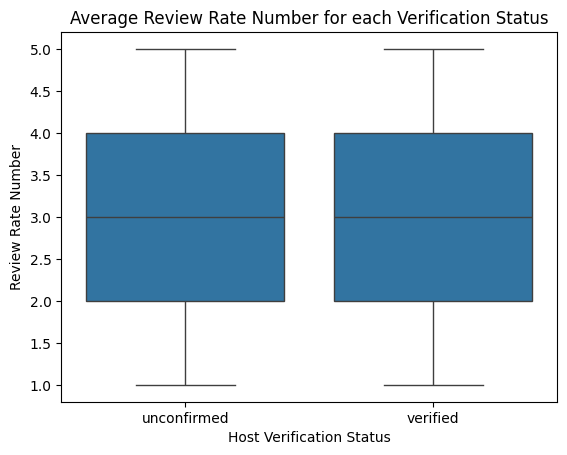

In [30]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate Number for each Verification Status');

In [31]:
#is there any correlation between the price of a listing and its service?
df['price_$'].corr(df['service fee_$'])

np.float64(0.9999910632732364)

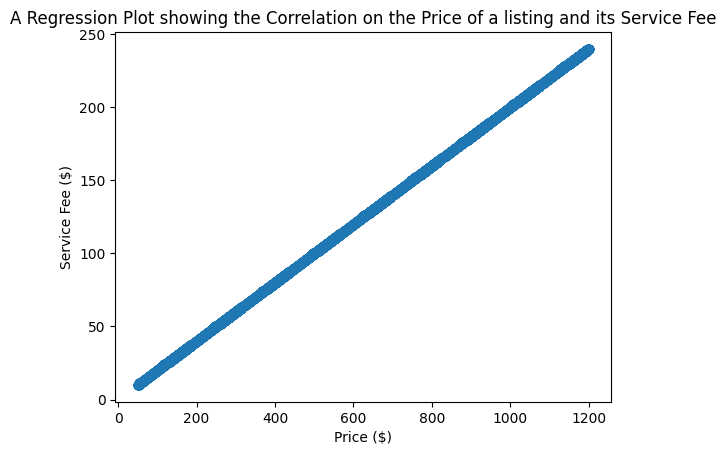

In [32]:
sns.regplot(df, x='price_$', y='service fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation on the Price of a listing and its Service Fee');

In [33]:
#what is the average review rate number (eg. stars) for listings, and does it vary based on the neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.074074
                    Private room               2.939086
                    Shared room                2.625000
Brooklyn            Entire home/apt            2.954774
                    Private room               3.015642
                    Shared room                3.060000
Manhattan           Entire home/apt            3.015966
                    Private room               3.016185
                    Shared room                2.930233
Queens              Entire home/apt            2.953521
                    Private room               2.964775
                    Shared room                3.125000
Staten Island       Entire home/apt            2.950820
                    Private room               3.163636

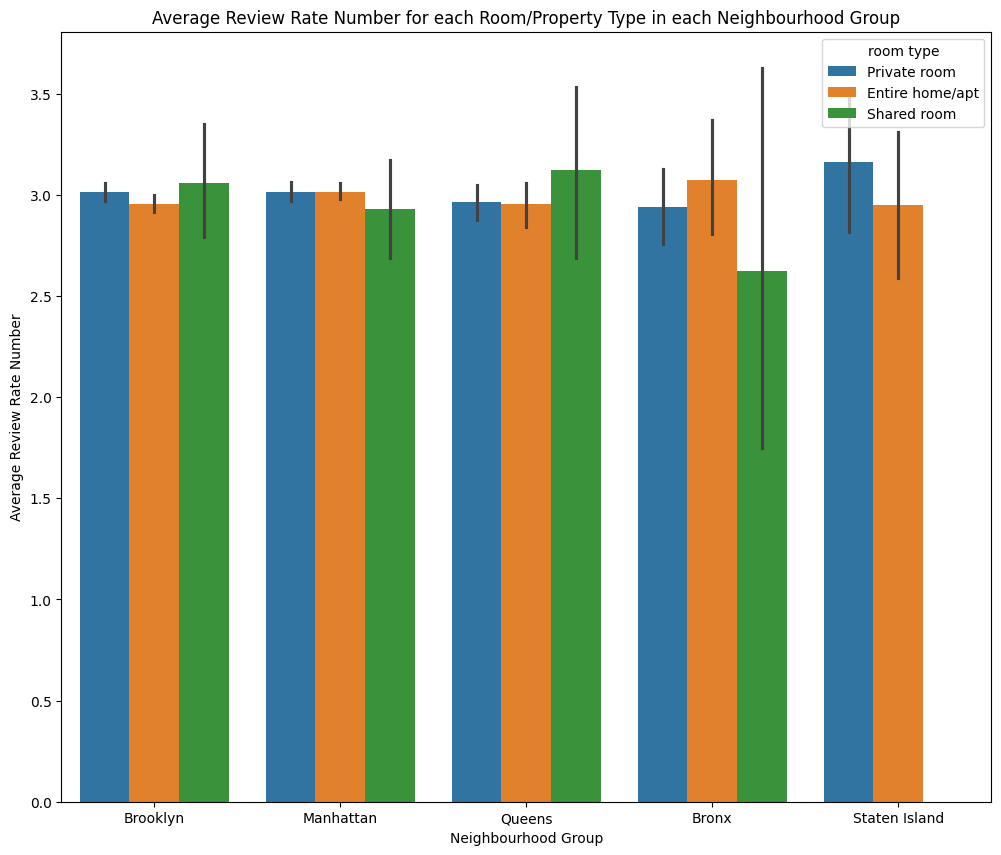

In [34]:
plt.figure(figsize = [12, 10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Room/Property Type in each Neighbourhood Group');

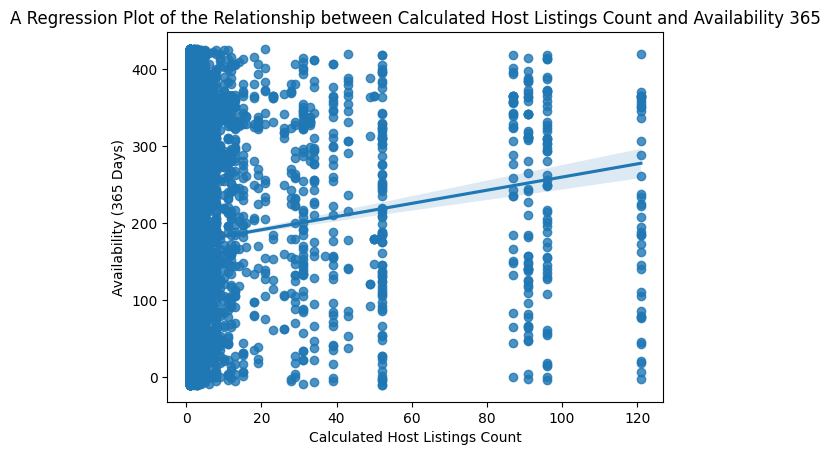

In [35]:
#are the host with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability (365 Days)');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [36]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.06981223539291033)